In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# **DREAMBOOTH** 🤖

Dreambooth es un modelo de generación de aprendizaje profundo, y que fue desarrollado en 2022 por un grupo de investigadores de Google Research y la Universidad de Boston. La misión de esta tecnología es la de poder entrenar a modelos de inteligencia artificial para personalizarlo según tus necesidades.



## ¿Como funciona? 🔩

El funcionamiento de esta técnica funciona en tres pasos.

1. En **primer lugar**, necesitas un modelo de difusión preentrenado, que es uno de esos sistemas de inteligencia artificial que pueden crear imágenes a partir de texto. Por ejemplo, se puede usar:
  - Stable Diffusion
  - DALL-E
  - Midjourney

  siempre y cuando funcionen con el proceso de ruido y denoising.

  Lo que hace esta técnica es crear una imagen completamente ruidosa, y luego ir quitando ese ruido reconstruyendo en el proceso una imagen totalmente original que se parezca a lo que le has pedido por texto. Pues es en este punto en el que Dreambooth ayudará con un modelo entrenado para que puedas obtener imágenes de sujetos concretos.

2.  el **segundo paso**, en el que necesitas un conjunto de imágenes del sujeto con el que quieres personalizar la IA. Puede ser un estilo, una cara, o lo que sea. Se recomienda tener un set de unas 8 o 10 imágenes como mínimo para poder entrenar el modelo.

  Entonces, lo que hace Dreambooth es **utilizar este set de imágenes para entrenar al modelo de difusión**, entrenar a la IA para que sepa reconocer lo que hay en ellas. Puede reconocer tu cara para luego poder dibujarla desde cero, así como un estilo o una posición.

3. Una vez has usado Dreambooth para entrenar a la IA, este sistema usará las imágenes del sujeto como punto de partida para el proceso de crear la imagen aleatoria, permitiendo que la IA tenga más información sobre cómo es el sujeto que quieres dibujar, y que así pueda hacer imágenes que se parezcan a él.

![Imagen](https://i.blogs.es/a42cbd/como-funciona/1366_2000.png)

# **Usando *Py-Dreambooth* en Jupyter Notebook Local**🧑‍💻

**Objectius:**

* Utilitza *Py-Dreambooth* per crear fàcilment imatges d'avatar d'IA a partir de fotos de tu, la teva família, amics o mascotes!

* Si us plau, executeu-vos en una màquina amb una GPU de 16GB o més.


## Instalació de paquets
* Instal·leu el paquet de Python *Py-Dreambooth* tal com es mostra a continuació.

In [ ]:
!pip install -q py_dreambooth

## Importa mòduls
* Hi ha diversos tipus de classes de model, però estaràs utilitzant el model més bàsic, el model Stable Diffusion Dreambooth `SDDreamboothModel`, però no t'has de preocupar per això ara mateix. 🤷‍♂️

In [ ]:
from py_dreambooth.dataset import LocalDataset
from py_dreambooth.model import SdDreamboothModel
from py_dreambooth.predictor import LocalPredictor
from py_dreambooth.trainer import LocalTrainer
from py_dreambooth.utils.image_helpers import display_images
from py_dreambooth.utils.prompt_helpers import make_prompt

Montem la relació entre el google drive i el quadern de jupyter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Preparem les dades 📸

In [ ]:
DATA_DIR = "/content/drive/MyDrive/ANN/DREAMBOOTH/data"  # el directori amb fotos per a que el model s'entreni
OUTPUT_DIR = "/content/drive/MyDrive/ANN/DREAMBOOTH/models"  # El directori on s'ubicaran els fitxers de model entrenats

dataset = LocalDataset(DATA_DIR)

* Molt important! En el `DATA_DIR` definit anteriorment, posar les imatges (jpg o png) del subjecte que es vol entrenar.

* Per a aquesta tasca, necessitareu entre 10 i 20 solos, selfies d'alta qualitat preses amb diferents fons, il·luminació i expressions facials. Crec que es pot trobar un gran exemple al [repositori de GitHub de Joe Penna](https://github.com/JoePenna/Dreambooth-Stable-Diffusion).

![Samples](https://raw.githubusercontent.com/JoePenna/Dreambooth-Stable-Diffusion/refs/heads/main/readme-images/better-training-images.png)

* Utilitzeu el mètode de processament d'imatges següent per retallar les imatges en un quadrat centrat a la cara. Si el subjecte que el model està tractant d'aprendre no és una persona (per exemple, un gos), estableix l'argument `detect_face` argumentant com a  `False`.


In [ ]:
dataset = dataset.preprocess_images(detect_face=True)

A total of 8 images were found.


 38%|███▊      | 3/8 [00:00<00:00,  6.17it/s]

No faces detected in the image '443008034_395930086752782_7217331932050061307_n.jpg'.
No faces detected in the image '440173417_1436258973657135_9081022692963550822_n.jpg'.


 75%|███████▌  | 6/8 [00:00<00:00,  6.41it/s]

No faces detected in the image '429164819_452647503759342_2302826312178258320_n.jpg'.


100%|██████████| 8/8 [00:01<00:00,  5.50it/s]

A total of 5 images were preprocessed and stored in the path '/content/drive/MyDrive/ANN/DREAMBOOTH/data_preproc'.


## Carregar el model 🤖

* Si reinicieu el nucli del bloc de notes i voleu tornar a carregar els models que ja heu entrenat, podeu fer-ho de la següent manera.

In [ ]:
predictor = LocalPredictor(model, OUTPUT_DIR)

## Crea imatges com vulgueu! 💃
* Utilitzeu les indicacions per crear qualsevol imatge que vulgueu. El text de l'indicatiu ha de contenir el nom de l'assumpte i el nom de la classe definits anteriorment.
* Tens problemes per arribar amb un bon prompte? No et preocupis. Podeu utilitzar la funció  `make_prompt` per a generar una sol·licitud comissariada a l'atzar. Mira això. 🙆‍♀️
* La creació de grans imatges pren paciència. Juga amb les indicacions, però si la qualitat de la pròpia generació és problemàtica, és possible que hagis de tornar a entrenar amb millors dades i paràmetres d'entrenament més adequats.

The prompt is as follows:
A photo of mire person with Simpsons


  0%|          | 0/50 [00:00<?, ?it/s]

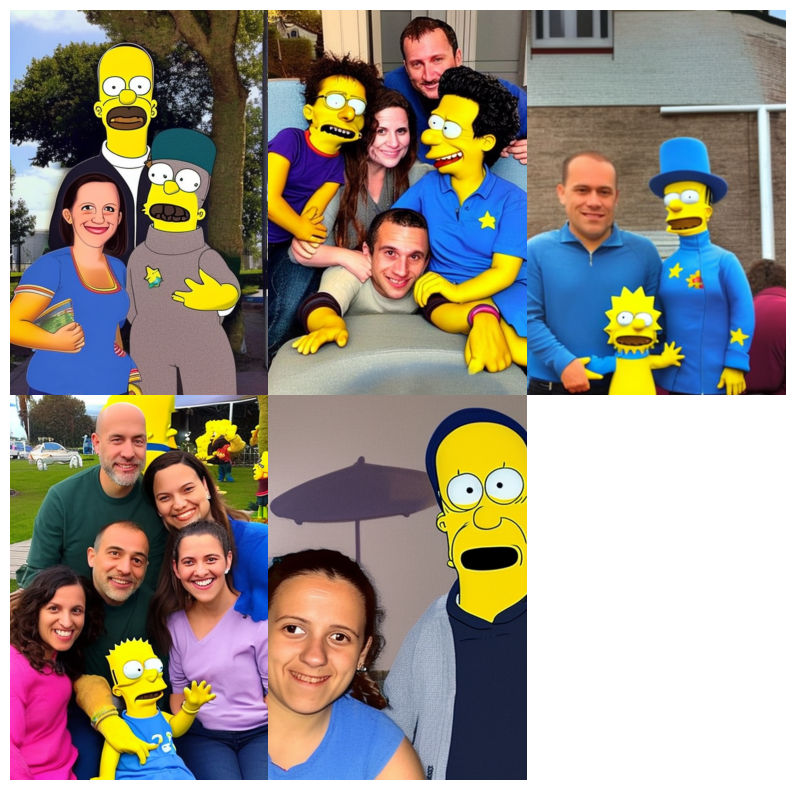

CPU times: user 45.9 s, sys: 3.72 s, total: 49.6 s
Wall time: 50.3 s


In [ ]:
%%time
prompt = f"A photo of {SUBJECT_NAME} {CLASS_NAME} with Simpsons"
# prompt = next(make_prompt(SUBJECT_NAME, CLASS_NAME))

print(f"The prompt is as follows:\n{prompt}")

images = predictor.predict(
    prompt,
    height = 768,
    width = 512,
    num_images_per_prompt = 5,
)

display_images(images, fig_size = 10)

## Bibliografia 💃
* [Stable Diffusion](https://www.xataka.com/basics/como-entrenar-a-ia-tu-cara-para-crear-avatares-gratis-stable-diffusion)
* [DreamBooth](https://www.xataka.com/basics/dreambooth-que-como-funciona-esta-tecnologia-para-entrenar-a-inteligencia-artificial)
* [Py-Dreambooth](https://github.com/JoePenna/Dreambooth-Stable-Diffusion?tab=readme-ov-file)